In [1]:
import os
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

In [2]:
def load_data():
    file_path = 'data.csv'
    df = pd.read_csv(file_path)
    print(df.info())
    
    # Replacing missing values with median of that specific column
    df['RM'].fillna(value=df['RM'].median(), inplace=True)
    
    x = df.drop('CRIM', axis=1).values
    y = df['CRIM'].values
    
    return x, y, df

In [3]:
X, y, data_frame = load_data()
print(f"\nData shape: {X.shape}\nLabels: {y.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB
None

Data shape: (511, 13)
Labels: (511,)


In [4]:
def normalize(data):
    min_val = np.min(data, axis=0)
    max_val = np.max(data, axis=0)
    norm_x = np.array([(row - min_val) / (max_val - min_val) for row in data])
    return norm_x

In [5]:
norm_x = normalize(data=X)
print(f"Normalized data shape: {norm_x.shape}")

Normalized data shape: (511, 13)


In [6]:
poly_transform = PolynomialFeatures(degree=2)
poly_x = poly_transform.fit_transform(norm_x)

print(f"Data after adding polynomial features")
print(f"Data shape: {poly_x.shape}")

Data after adding polynomial features
Data shape: (511, 105)


In [7]:
def correlation_heatmap(dataframe):
    plt.figure(figsize=(20, 10))
    corr_mat = dataframe[dataframe.keys()].corr()
    sns.heatmap(corr_mat, cmap='RdBu_r', robust=True, annot=True)
    plt.show()

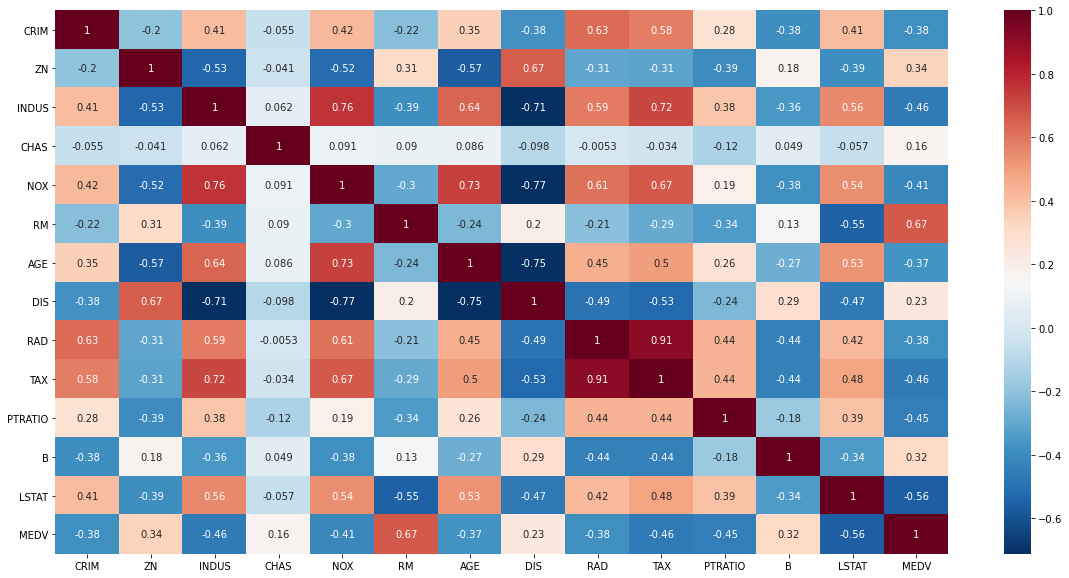

In [8]:
correlation_heatmap(dataframe=data_frame)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(poly_x, y, test_size=0.2, shuffle=True, random_state=42)
print(f"Training data shape: {x_train.shape}, labels: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}, labels: {y_test.shape}")

Training data shape: (408, 105), labels: (408,)
Testing data shape: (103, 105), labels: (103,)


In [10]:
def compute_cost(features, labels, parameters):
    m = labels.size
    h_x = np.dot(features, parameters)
    cost = (1 / (2 * m)) * sum(np.square(h_x - labels))
    return cost


def gradient_descent(features, labels, epochs, learning_rate):
    J = []
    m = labels.size
    thetas = np.random.random(size=features[0, :].shape)
    for _ in range(epochs):
        h_x = np.dot(features, thetas)
        for i in range(len(thetas)):
            thetas[i] -= (learning_rate / m) * sum((h_x - labels) * features[:, i])
        J.append(compute_cost(features=features, labels=labels, parameters=thetas))

    return thetas, J


def visualize_loss(cost):
    plt.plot(cost)
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost J')
    plt.show()


def MSE(actual, prediction):
    mse = np.sum(np.square(actual - prediction))
    return mse / len(actual)


In [ ]:
alpha = 0.01
epochs = 10000
thetas, J = gradient_descent(features=x_train, labels=y_train, epochs=epochs, learning_rate=alpha)
print(f"Optimized Thetas: {thetas}")

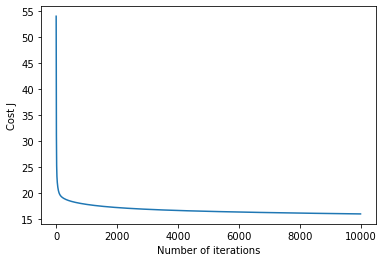

MSE of training set: 31.911778063509818
MSE of testing set: 52.02755369219994


In [12]:
visualize_loss(cost=J)
print("MSE of training set: {}".format(MSE(y_train, np.dot(x_train, thetas))))
print("MSE of testing set: {}".format(MSE(y_test, np.dot(x_test, thetas))))